In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSA/Wine_clust.csv")

In [3]:
numeric_df = df.select_dtypes(include=[np.number]).dropna().reset_index(drop=True)

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df.values)

In [5]:
pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X_scaled)

In [6]:
print("Data rows, cols:", numeric_df.shape)

Data rows, cols: (178, 17)


Kmeans

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [8]:
best_k = None
best_sil = -1
best_model = None

for k in range(2, 11):
    m = KMeans(n_clusters=k, random_state=0, n_init=10).fit(X_scaled)
    sil = silhouette_score(X_scaled, m.labels_)
    print(f"KMeans k={k} silhouette={sil:.4f}")
    if sil > best_sil:
        best_sil = sil
        best_k = k
        best_model = m

KMeans k=2 silhouette=0.3253
KMeans k=3 silhouette=0.3561
KMeans k=4 silhouette=0.3409
KMeans k=5 silhouette=0.3108
KMeans k=6 silhouette=0.2153
KMeans k=7 silhouette=0.2145
KMeans k=8 silhouette=0.1978
KMeans k=9 silhouette=0.1504
KMeans k=10 silhouette=0.1593


In [9]:
print("Chosen KMeans k:", best_k, "silhouette:", round(best_sil,4))

Chosen KMeans k: 3 silhouette: 0.3561


In [10]:
numeric_df["KMeans_cluster"] = best_model.labels_

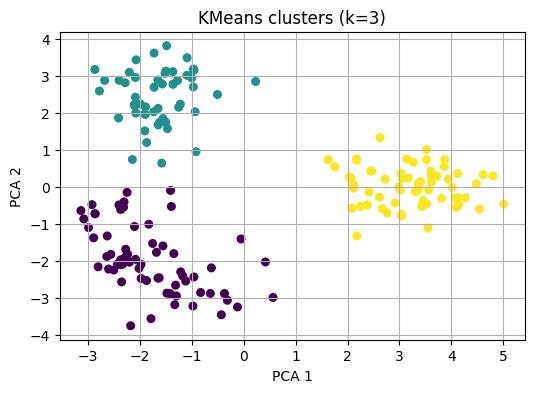

In [13]:
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0], X_pca[:,1], c=numeric_df["KMeans_cluster"], s=30)
plt.title(f"KMeans clusters (k={best_k})")
plt.xlabel("PCA 1"); plt.ylabel("PCA 2")
plt.grid(True)
plt.show()



Agglomerative

In [14]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [15]:
best_k = None
best_sil = -1
best_labels = None

for k in range(2, 11):
    labels = AgglomerativeClustering(n_clusters=k).fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    print(f"Agglomerative k={k} silhouette={sil:.4f}")
    if sil > best_sil:
        best_sil = sil
        best_k = k
        best_labels = labels

Agglomerative k=2 silhouette=0.3224
Agglomerative k=3 silhouette=0.3485
Agglomerative k=4 silhouette=0.3332
Agglomerative k=5 silhouette=0.2600
Agglomerative k=6 silhouette=0.2065
Agglomerative k=7 silhouette=0.2139
Agglomerative k=8 silhouette=0.1996
Agglomerative k=9 silhouette=0.2013
Agglomerative k=10 silhouette=0.2046


In [16]:
print("Chosen Agglomerative k:", best_k, "silhouette:", round(best_sil,4))

Chosen Agglomerative k: 3 silhouette: 0.3485


In [17]:
numeric_df["Agglomerative_cluster"] = best_labels

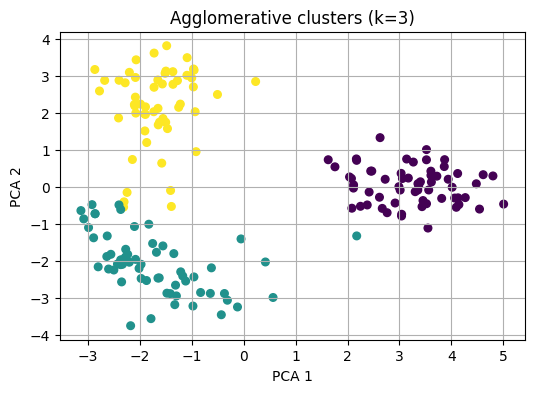

In [19]:
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0], X_pca[:,1], c=numeric_df["Agglomerative_cluster"], s=30)
plt.title(f"Agglomerative clusters (k={best_k})")
plt.xlabel("PCA 1"); plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Gaussian Mixture

In [20]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [21]:

best_k = None
best_sil = -1
best_labels = None
best_model = None

for k in range(2, 11):
    gmm = GaussianMixture(n_components=k, random_state=0).fit(X_scaled)
    labels = gmm.predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    print(f"GMM k={k} silhouette={sil:.4f}")
    if sil > best_sil:
        best_sil = sil
        best_k = k
        best_labels = labels
        best_model = gmm

GMM k=2 silhouette=0.2410
GMM k=3 silhouette=0.3561
GMM k=4 silhouette=0.2667
GMM k=5 silhouette=0.2214
GMM k=6 silhouette=0.2125
GMM k=7 silhouette=0.1863
GMM k=8 silhouette=0.1945
GMM k=9 silhouette=0.1430
GMM k=10 silhouette=0.1415


In [22]:
print("Chosen GMM k:", best_k, "silhouette:", round(best_sil,4))

Chosen GMM k: 3 silhouette: 0.3561


In [23]:
numeric_df["GMM_cluster"] = best_labels

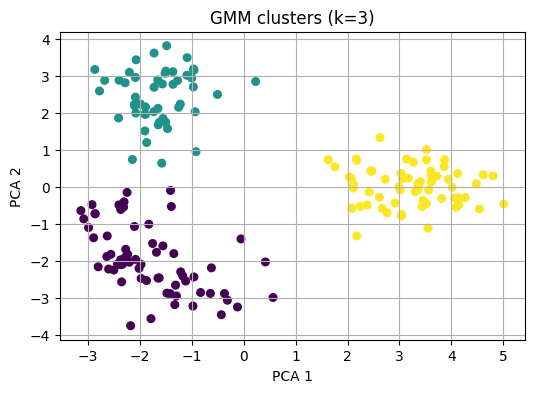

In [24]:
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0], X_pca[:,1], c=numeric_df["GMM_cluster"], s=30)
plt.title(f"GMM clusters (k={best_k})")
plt.xlabel("PCA 1"); plt.ylabel("PCA 2")
plt.grid(True)
plt.show()